In [10]:
import os
import sys
import ctypes

def run_as_admin():
    if sys.platform.startswith('win'):
        app_dir = os.path.dirname(os.path.realpath(sys.argv[0]))
        cmd_args = sys.argv[:]
        cmd_args.insert(0, sys.executable)
        cmd_args = ['"{}"'.format(arg) for arg in cmd_args]
        cmd = '{} -m {}'.format(sys.executable, ' '.join(cmd_args))
        ctypes.windll.shell32.ShellExecuteW(None, "runas", cmd, None, app_dir, 1)

if __name__ == '__main__':
    run_as_admin()


In [11]:
# import libraries
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from PIL import Image
import shutil
import random
import matplotlib.pyplot as plt

In [12]:
# Path to data folder
data_dir = os.path.join(os.getcwd(), 'Brain Tumor MRI')

# Path to processed data
output_dir = os.path.join(os.getcwd(), 'Processed Data')

In [13]:
# check if folder was created
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [14]:
# Iteration by data in folder
for dir_name in os.listdir(data_dir):
    # Create path to folder with images
    dir_path = os.path.join(data_dir, dir_name)
    #Check if item is folder or hidden file
    if os.path.isdir(dir_path) and not dir_name.startswith("."):
        print(f"Processing images in {dir_name}...")
        #Create path to output directory for such type of images
        output_path = os.path.join(output_dir, dir_name)
        if not os.path.exists(output_path):
            os.makedirs(output_path)
        # Iteration by files in folder
        for filename in os.listdir(dir_path):
            # Check if file is mage
            if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
                # Load file, initial processing
                img_path = os.path.join(dir_path, filename)
                with Image.open(img_path) as img:
                    img = img.rotate(90)
                    # Save processed image
                    output_filename = os.path.join(output_path, filename)
                    img.save(output_filename)

Processing images in Astrocitoma T1...
Processing images in Astrocitoma T1C+...
Processing images in Astrocitoma T2...
Processing images in Carcinoma T1...
Processing images in Carcinoma T1C+...
Processing images in Carcinoma T2...
Processing images in Ependimoma T1...
Processing images in Ependimoma T1C+...
Processing images in Ependimoma T2...
Processing images in Ganglioglioma T1...
Processing images in Ganglioglioma T1C+...
Processing images in Ganglioglioma T2...
Processing images in Germinoma T1...
Processing images in Germinoma T1C+...
Processing images in Germinoma T2...
Processing images in Glioblastoma T1...
Processing images in Glioblastoma T1C+...
Processing images in Glioblastoma T2...
Processing images in Granuloma T1...
Processing images in Granuloma T1C+...
Processing images in Granuloma T2...
Processing images in Meduloblastoma T1...
Processing images in Meduloblastoma T1C+...
Processing images in Meduloblastoma T2...
Processing images in Meningioma T1...
Processing im

In [15]:
# Input data dimensions
IMG_HEIGHT = 256
IMG_WIDTH = 256

# Initial pre processing
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        print(f'Preprocessing of {folder_name}')
        output_folder_path = os.path.join(output_dir, folder_name)
        if not os.path.exists(output_folder_path):
            os.makedirs(output_folder_path)
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.jpg'):
                file_path = os.path.join(folder_path, file_name)
                img = cv2.imread(file_path, cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
                img = img / 255.0
                output_file_path = os.path.join(output_folder_path, file_name)
                cv2.imwrite(output_file_path, img * 255.0)

Preprocessing of Astrocitoma T1
Preprocessing of Astrocitoma T1C+
Preprocessing of Astrocitoma T2
Preprocessing of Carcinoma T1
Preprocessing of Carcinoma T1C+
Preprocessing of Carcinoma T2
Preprocessing of Ependimoma T1
Preprocessing of Ependimoma T1C+
Preprocessing of Ependimoma T2
Preprocessing of Ganglioglioma T1
Preprocessing of Ganglioglioma T1C+
Preprocessing of Ganglioglioma T2
Preprocessing of Germinoma T1
Preprocessing of Germinoma T1C+
Preprocessing of Germinoma T2
Preprocessing of Glioblastoma T1
Preprocessing of Glioblastoma T1C+
Preprocessing of Glioblastoma T2
Preprocessing of Granuloma T1
Preprocessing of Granuloma T1C+
Preprocessing of Granuloma T2
Preprocessing of Meduloblastoma T1
Preprocessing of Meduloblastoma T1C+
Preprocessing of Meduloblastoma T2
Preprocessing of Meningioma T1
Preprocessing of Meningioma T1C+
Preprocessing of Meningioma T2
Preprocessing of Neurocitoma T1
Preprocessing of Neurocitoma T1C+
Preprocessing of Neurocitoma T2
Preprocessing of Oligodend

In [16]:
# Definiujemy ścieżkę do folderu Processed Data
processed_data_path = os.path.join(os.getcwd(), 'Processed Data')

# Definiujemy ścieżki do folderów train, test i validation
train_path = os.path.join(processed_data_path, "train")
val_path = os.path.join(processed_data_path, "validation")
test_path = os.path.join(processed_data_path, "test")

# Definiujemy stosunek podziału plików na zbiory train, validation i test
train_split = 0.6
test_split = 0.2
val_split = 0.2

# Dla każdego folderu w folderze Processed Data
for folder_name in os.listdir(processed_data_path):
    folder_path = os.path.join(processed_data_path, folder_name)
    if os.path.isdir(folder_path):
        # Tworzymy foldery train, validation i test dla tego folderu
        train_folder_path = os.path.join(train_path, folder_name)
        val_folder_path = os.path.join(val_path, folder_name)
        test_folder_path = os.path.join(test_path, folder_name)
        os.makedirs(train_folder_path, exist_ok=True)
        os.makedirs(val_folder_path, exist_ok=True)
        os.makedirs(test_folder_path, exist_ok=True)
        
        # Tworzymy listę plików dla tego folderu i losujemy ich kolejność
        files = os.listdir(folder_path)
        random.shuffle(files)
        
        # Kopiujemy pliki do folderów train, validation i test zgodnie ze stosunkiem podziału
        train_files = files[:int(train_split * len(files))]
        val_files = files[int(train_split * len(files)):int((train_split + val_split) * len(files))]
        test_files = files[int((train_split + val_split) * len(files)):]
        for file_name in train_files:
            src_path = os.path.join(folder_path, file_name)
            dst_path = os.path.join(train_folder_path, file_name)
            shutil.copy(src_path, dst_path)
        for file_name in val_files:
            src_path = os.path.join(folder_path, file_name)
            dst_path = os.path.join(val_folder_path, file_name)
            shutil.copy(src_path, dst_path)
        for file_name in test_files:
            src_path = os.path.join(folder_path, file_name)
            dst_path = os.path.join(test_folder_path, file_name)
            shutil.copy(src_path, dst_path)


In [17]:
# Definiujemy ścieżkę do folderu train
train_path = os.path.join("Processed Data", "train")

# Inicjujemy listy, w których będziemy przechowywać informacje o danych
classes = []
num_images = []
dimensions = []
pixel_means = []

# Dla każdej klasy w folderze train
for class_name in os.listdir(train_path):
    class_path = os.path.join(train_path, class_name)
    if os.path.isdir(class_path):
        # Dodajemy nazwę klasy do listy classes
        classes.append(class_name)
        
        # Inicjujemy zmienną do zliczania liczby obrazów w klasie
        class_num_images = 0
        
        # Inicjujemy listę, w której będziemy przechowywać rozmiary obrazów w klasie
        class_dimensions = []
        
        # Inicjujemy listę, w której będziemy przechowywać średnie wartości pikseli w obrazach w klasie
        class_pixel_means = []
        
        # Dla każdego obrazu w klasie
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            if os.path.isfile(image_path):
                # Wczytujemy obraz i dodajemy jego rozmiar do listy class_dimensions
                image = plt.imread(image_path)
                height, width = image.shape[:2]
                class_dimensions.append((height, width))
                
                # Obliczamy średnią wartość pikseli w obrazie i dodajemy ją do listy class_pixel_means
                pixel_mean = image.mean()
                class_pixel_means.append(pixel_mean)
                
                # Zwiększamy licznik liczby obrazów w klasie
                class_num_images += 1
        
        # Dodajemy liczbę obrazów w klasie do listy num_images
        num_images.append(class_num_images)
        
        # Obliczamy średni rozmiar obrazów w klasie
        class_avg_height = sum([dim[0] for dim in class_dimensions]) / class_num_images
        class_avg_width = sum([dim[1] for dim in class_dimensions]) / class_num_images
        class_avg_dimension = (class_avg_height, class_avg_width)
        dimensions.append(class_avg_dimension)
        
        # Obliczamy średnią wartość pikseli we wszystkich obrazach w klasie
        class_avg_pixel_mean = sum(class_pixel_means) / class_num_images
        pixel_means.append(class_avg_pixel_mean)

# Wyświetlamy informacje o danych
for i, class_name in enumerate(classes):
    print(f"Class {i + 1}: {class_name}")
    print(f"Number of images: {num_images[i]}")
    print(f"Average dimensions: {dimensions[i]}")
    print(f"Average pixel mean: {pixel_means[i]}")
    print()


Class 1: Astrocitoma T1
Number of images: 105
Average dimensions: (529.8095238095239, 521.5428571428571)
Average pixel mean: 43.63465415402598

Class 2: Astrocitoma T1C+
Number of images: 139
Average dimensions: (565.9280575539568, 556.1798561151079)
Average pixel mean: 44.41866468972177

Class 3: Astrocitoma T2
Number of images: 102
Average dimensions: (539.5, 522.1470588235294)
Average pixel mean: 44.41391699130351

Class 4: Carcinoma T1
Number of images: 39
Average dimensions: (610.8205128205128, 537.2051282051282)
Average pixel mean: 75.23976400112991

Class 5: Carcinoma T1C+
Number of images: 66
Average dimensions: (590.3333333333334, 521.8939393939394)
Average pixel mean: 56.666862319421355

Class 6: Carcinoma T2
Number of images: 43
Average dimensions: (569.1162790697674, 504.13953488372096)
Average pixel mean: 38.1504178602061

Class 7: Ependimoma T1
Number of images: 27
Average dimensions: (616.1481481481482, 588.4444444444445)
Average pixel mean: 44.236971348686396

Class 8: 

C:\Users\andrz\AppData\Local\Temp/ipykernel_62396/1739451539.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classes, rotation=45, ha='right')


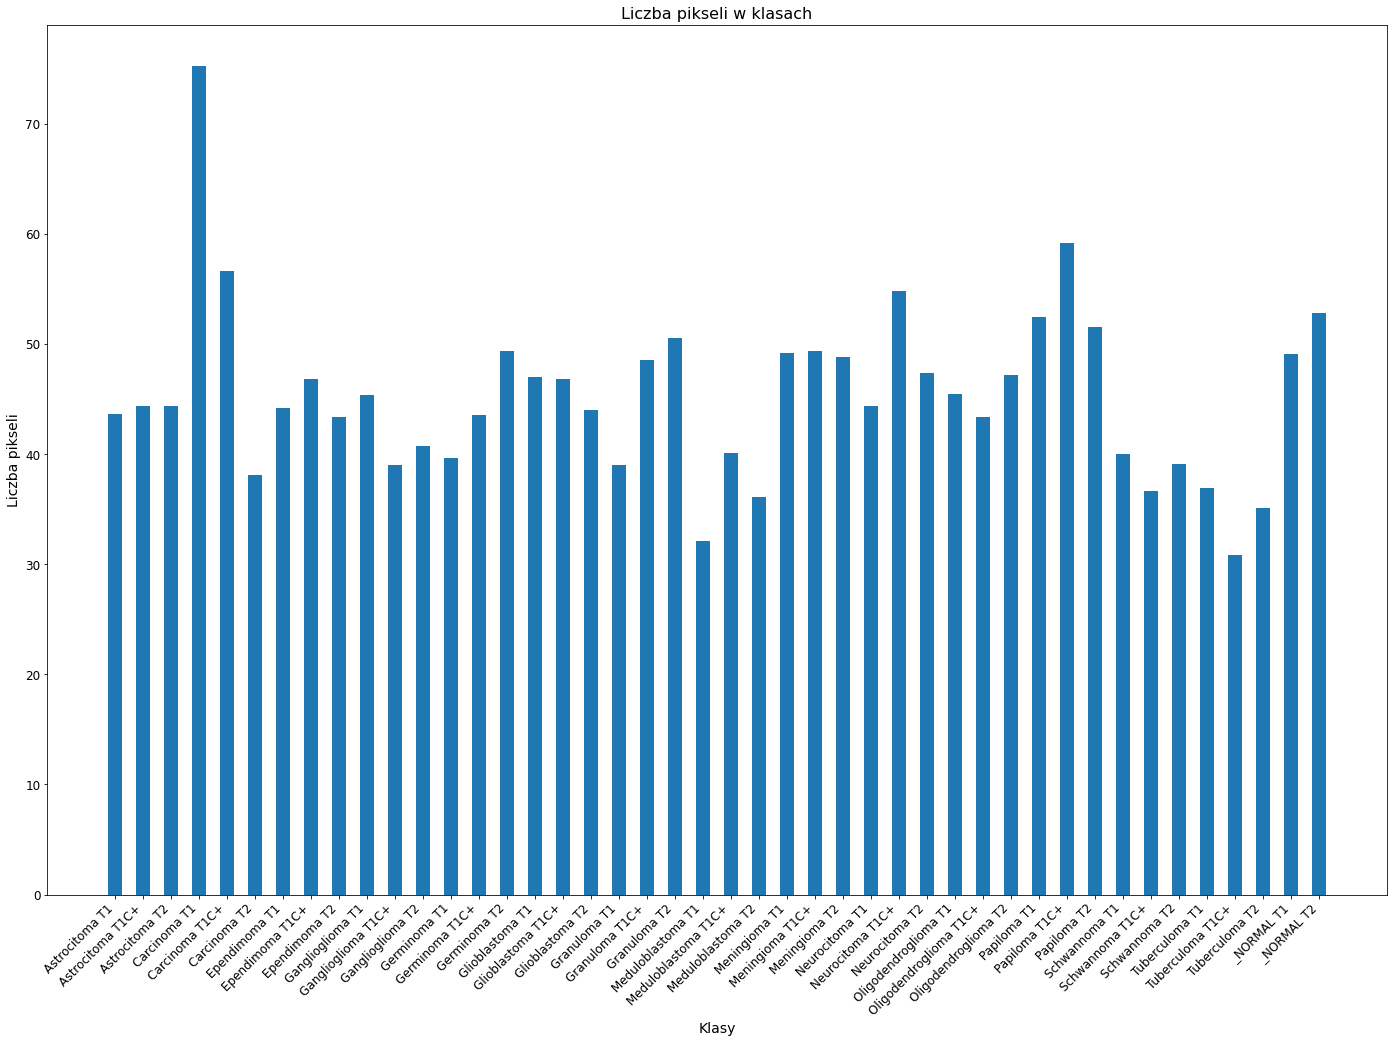

In [35]:
# tworzenie wykresu
fig, ax = plt.subplots(figsize=(24, 16))
ax.bar(classes, pixel_means, width=0.5)

# dodanie etykiet osi i tytułu wykresu
ax.set_xlabel('Klasy', fontsize=14)
ax.set_ylabel('Liczba pikseli', fontsize=14)
ax.set_title('Liczba pikseli w klasach', fontsize=16)

# zmiana układu osi
ax.set_xticklabels(classes, rotation=45, ha='right')

# zmiana rozmiaru czcionki
plt.rcParams.update({'font.size': 12})

# wyświetlenie wykresu
plt.show()